### **Overfitting**<br> 
When your model captures patterns in your training data too well - meaning it doesn't generalize well to unseen data.

## **Preventing Overfitting** 

**Regularization:** Introducing a penalty for overly complex features that reduces - or eliminates - their weight in our model.

Two common types of regularization include **Lasso or L1 regularization** and **Ridge or L2 regularization**.

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
bc = pd.DataFrame(df.data,columns=df.feature_names)
bc['target'] = pd.Series(df.target)

In [3]:
bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Example: L1 regularization in a Logistic Regression model.**

Train/Test Split

In [4]:
from sklearn.model_selection import train_test_split

X, y = bc.iloc[:, :-1].values, bc.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

Scale features

In [5]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(penalty='l1', C=0.2, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)

print('Training accuracy:', round(lr.score(X_train_std, y_train),3))
print('Test accuracy:', round(lr.score(X_test_std, y_test),3))

Training accuracy: 0.99
Test accuracy: 0.947


In [7]:
import pandas as pd

In [8]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

In [9]:
bc = pd.DataFrame(df.data,columns=df.feature_names)

In [10]:
bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
from sklearn.model_selection import train_test_split

X, y = bc.iloc[:, 1:].values, bc.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train_minmax = scale.fit_transform(X_train)
X_test_minmax = scale.transform(X_test)

In [13]:
X_test_minmax

array([[0.44854772, 0.30993021, 0.17527041, ..., 0.70651051, 0.39818648,
        0.36639118],
       [0.64481328, 0.27855711, 0.16729586, ..., 0.20685498, 0.17327025,
        0.08421881],
       [0.24688797, 0.31649506, 0.19639449, ..., 0.28301757, 0.11255667,
        0.07910272],
       ...,
       [0.37219917, 0.31055214, 0.18133616, ..., 0.44230107, 0.25310467,
        0.23133937],
       [0.49211618, 0.28643494, 0.17077413, ..., 0.19338615, 0.2113148 ,
        0.07569198],
       [0.50746888, 0.10517587, 0.05111347, ..., 0.08832243, 0.17149616,
        0.12390135]])

In [14]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train_stdscale = std_scale.fit_transform(X_train)
X_test_stdscale = std_scale.transform(X_test)

In [15]:
X_test_stdscale

array([[ 0.31710749, -0.14938447, -0.2872433 , ...,  1.36998461,
         1.0939611 ,  1.51560644],
       [ 1.44727832, -0.33290634, -0.33859574, ..., -0.84095647,
        -0.70686766, -0.88310324],
       [-0.84412512, -0.11098232, -0.15121395, ..., -0.50394228,
        -1.19298094, -0.92659449],
       ...,
       [-0.12253613, -0.14574637, -0.24818266, ...,  0.20087616,
        -0.06766026,  0.36754897],
       [ 0.56799108, -0.28682376, -0.31619734, ..., -0.90055508,
        -0.40225771, -0.95558866],
       [ 0.65639767, -1.34712739, -1.08675715, ..., -1.36545479,
        -0.72107227, -0.54576727]])

# Date Leakage
What is data leakage?
Data leakage can be thought of as anytime information from outside your training set enters your model.
How to detect and prevent data leakage
Are any features surprisingly highly correlated with your target variable?

In [16]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [18]:
import pandas as pd
df = pd.read_csv('sunspots.csv') #source machinelearningmastery.com
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [19]:
#first ensure sorted by date asc
df.sort_values('Month')

#first 75 percent of records in train, remaining in test
train_len = int(len(df)*.75)
train, test = df[0:train_len], df[train_len:len(df)]
print(train.shape,test.shape)

(2115, 2) (705, 2)


In [20]:
from sklearn.model_selection import train_test_split
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train_minmax = scale.fit_transform(X_train)
X_test_minmax = scale.transform(X_test)

# How to treat for Imbalanced Data?
Introducing the imbalanced-learn (imblearn) package.


In [7]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=3,
                            n_clusters_per_class=1,
                            weights=[0.01, 0.05, 0.94],
                            class_sep=0.8, random_state=0)

In [8]:
import pandas as pd
df = pd.DataFrame(X)
df.columns = ['feature_1','feature_2']
df['target']= y
df.head()

,feature_1,feature_2,target
0,0.662420,-0.763477,2
1,-0.201381,-2.469794,2
2,1.208045,-0.332895,2
3,1.375456,0.974206,2
4,0.215885,-1.556261,2


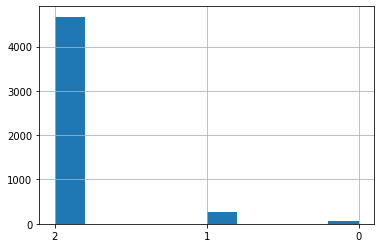

In [9]:
df['target'].astype(str).hist()

Now, let's apply an over-sampling approach. For this we'll use a naive approach known as random over-sampling.

In [5]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

In [10]:
X_resampled, y_resampled = ros.fit_resample(X, y)

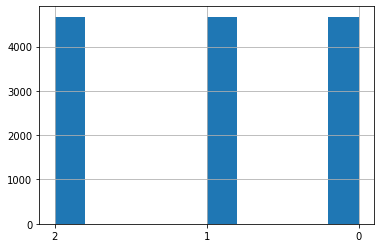

In [11]:
df = pd.DataFrame(y_resampled)
df[0].astype(str).hist()

Let's now try an under-sampling technique. Again, we'll start with a naive approach to randomly under-sample our majority class.

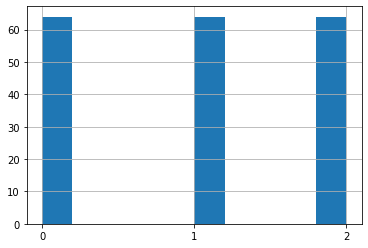

In [12]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
df = pd.DataFrame(y_resampled)
df[0].astype(str).hist()

# Interpreting your coefficients with multicollinearity

Multicollinearity is when one predictor variable in your regression model can be accurately predicted from the others.

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np

#Load the data set
iris = sns.load_dataset("iris")
iris.head()
iris = iris[iris['species']!='setosa']
iris['species'] = iris['species'].apply(lambda x: 1 if x == 'versicolor' else 0)

In [14]:
y = iris['species']
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]

In [15]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

X = add_constant(X)

model = sm.Logit(y, X)
 
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:                  0.9142
Time:                        15:42:14   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6378     25.708      1.659      0.097      -7.748      93.024
sepal_length     2.465

Variance Inflation Factor (VIF) tells us the extent to which we have multicollinearity in our result - a factor of 5 to 10 or more is considered high and tells us to be wary of the model coefficients.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [17]:
pd.DataFrame(list(zip(list(X.columns),vif)))

,0,1
0,const,125.170277
1,sepal_length,3.990113
2,sepal_width,1.721954
3,petal_length,7.252447
4,petal_width,3.948354


# Beyond Accuracy

Accuracy: The share of all total predictions that were correct.

In [18]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=2,
                            n_clusters_per_class=1,
                            weights=[.95,0.05],
                            class_sep=0.8, random_state=0)

In [19]:
import pandas as pd
df = pd.DataFrame(X)
df.columns = ['feature_1','feature_2']
df['target']= y

In [20]:
df['prediction']=0

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(df['target'], df['prediction'])

0.944

In [22]:
pos = df[df['target']==1]
accuracy_score(pos['target'], pos['prediction'])

0.0

In [23]:
neg = df[df['target']==0]
accuracy_score(neg['target'], neg['prediction'])

1.0

In [24]:
import numpy as np
df['prediction']=np.random.randint(0,2,df.shape[0])

In [25]:
df.head()

,feature_1,feature_2,target,prediction
0,-0.200228,-1.126880,0,1
1,-0.873630,0.999259,0,0
2,-0.722953,0.106167,0,0
3,-0.548422,1.903053,0,0
4,-1.254758,2.445131,0,0


In [26]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(df['target'], df['prediction'])

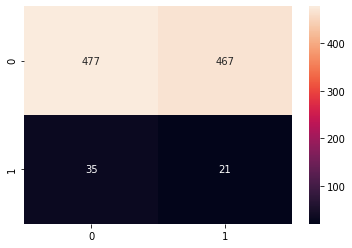

In [27]:
import seaborn as sns
sns.heatmap(confusion, annot=True, fmt='g')

Recall is the ability of the classifier to find all the positive samples

In [28]:
from sklearn.metrics import recall_score
recall_score(df['target'], df['prediction'])

0.375

In [29]:
from sklearn.metrics import precision_score
precision_score(df['target'], df['prediction'])

0.0430327868852459

F1 Score: the weighted average of precision and recall

In [30]:
from sklearn.metrics import f1_score
f1_score(df['target'], df['prediction'])

0.07720588235294118